In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn import tree

#load data
data = pd.read_csv('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE DEGREE UAB/AI 2nd course 2nd semester/Synthesis Project/Synthesis_data_final')

# label encoding
le_translator = preprocessing.LabelEncoder()
data['TRANSLATOR'] = le_translator.fit_transform(data['TRANSLATOR'])

# separate features and target
X = data.drop('TRANSLATOR', axis=1)
y = data['TRANSLATOR']

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:

# train a random forest classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [7]:
from sklearn.metrics import classification_report
import numpy as np

def filtered_classification_report(y_true, y_pred, labels, min_support=0):
    # Convert y_true and y_pred to numpy arrays if they are not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Count the occurrences of each label in y_true
    label_counts = {}
    for label in labels:
        label_counts[label] = np.count_nonzero(y_true == label)

    # Filter out labels with support less than min_support
    filtered_labels = [label for label in labels if label_counts[label] >= min_support]

    # Filter y_true and y_pred based on filtered_labels
    filtered_indices = np.isin(y_true, filtered_labels)
    filtered_y_true = y_true[filtered_indices]
    filtered_y_pred = y_pred[filtered_indices]

    # Find labels with support greater than 0
    labels_with_support = [label for label in filtered_labels if label_counts[label] > 0]

    # Calculate and return the classification report
    report = classification_report(filtered_y_true, filtered_y_pred, labels=labels_with_support)

    return report

In [8]:
# get predicted values
y_pred = rfc.predict(X_test)

# calculate metrics
translator_classes = le_translator.classes_
y_test_names = le_translator.inverse_transform(y_test)
y_pred_names = le_translator.inverse_transform(y_pred)


In [9]:
unique_labels = set(y_test_names)
labels = list(unique_labels)

report = filtered_classification_report(y_test_names, y_pred_names, labels, min_support=50)


print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           2       0.85      0.94      0.89       637
           3       0.69      0.72      0.71       388
           7       0.54      0.44      0.49        90
           9       0.92      0.95      0.94      2040
          11       0.86      0.92      0.89      1249
          20       0.93      0.94      0.93      1544
          36       0.86      0.88      0.87       588
          38       0.54      0.48      0.51        75
          39       1.00      0.81      0.89        63
          41       0.67      0.65      0.66       196
          47       0.64      0.67      0.65       123
          49       0.89      0.89      0.89        70
          52       0.67      0.67      0.67       116
          55       0.99      1.00      0.99       417
          58       0.93      0.96      0.94      1451
          59       0.42      0.44      0.43       135
          65       0.91      0.90      0.91       334
    

Look at that! Even better results than with DT's:

**Average Accuracy:** 0.82

**Average Recall:** 0.79

**Average F1-Score:** 0.80

Lets show the first tree in our forest:

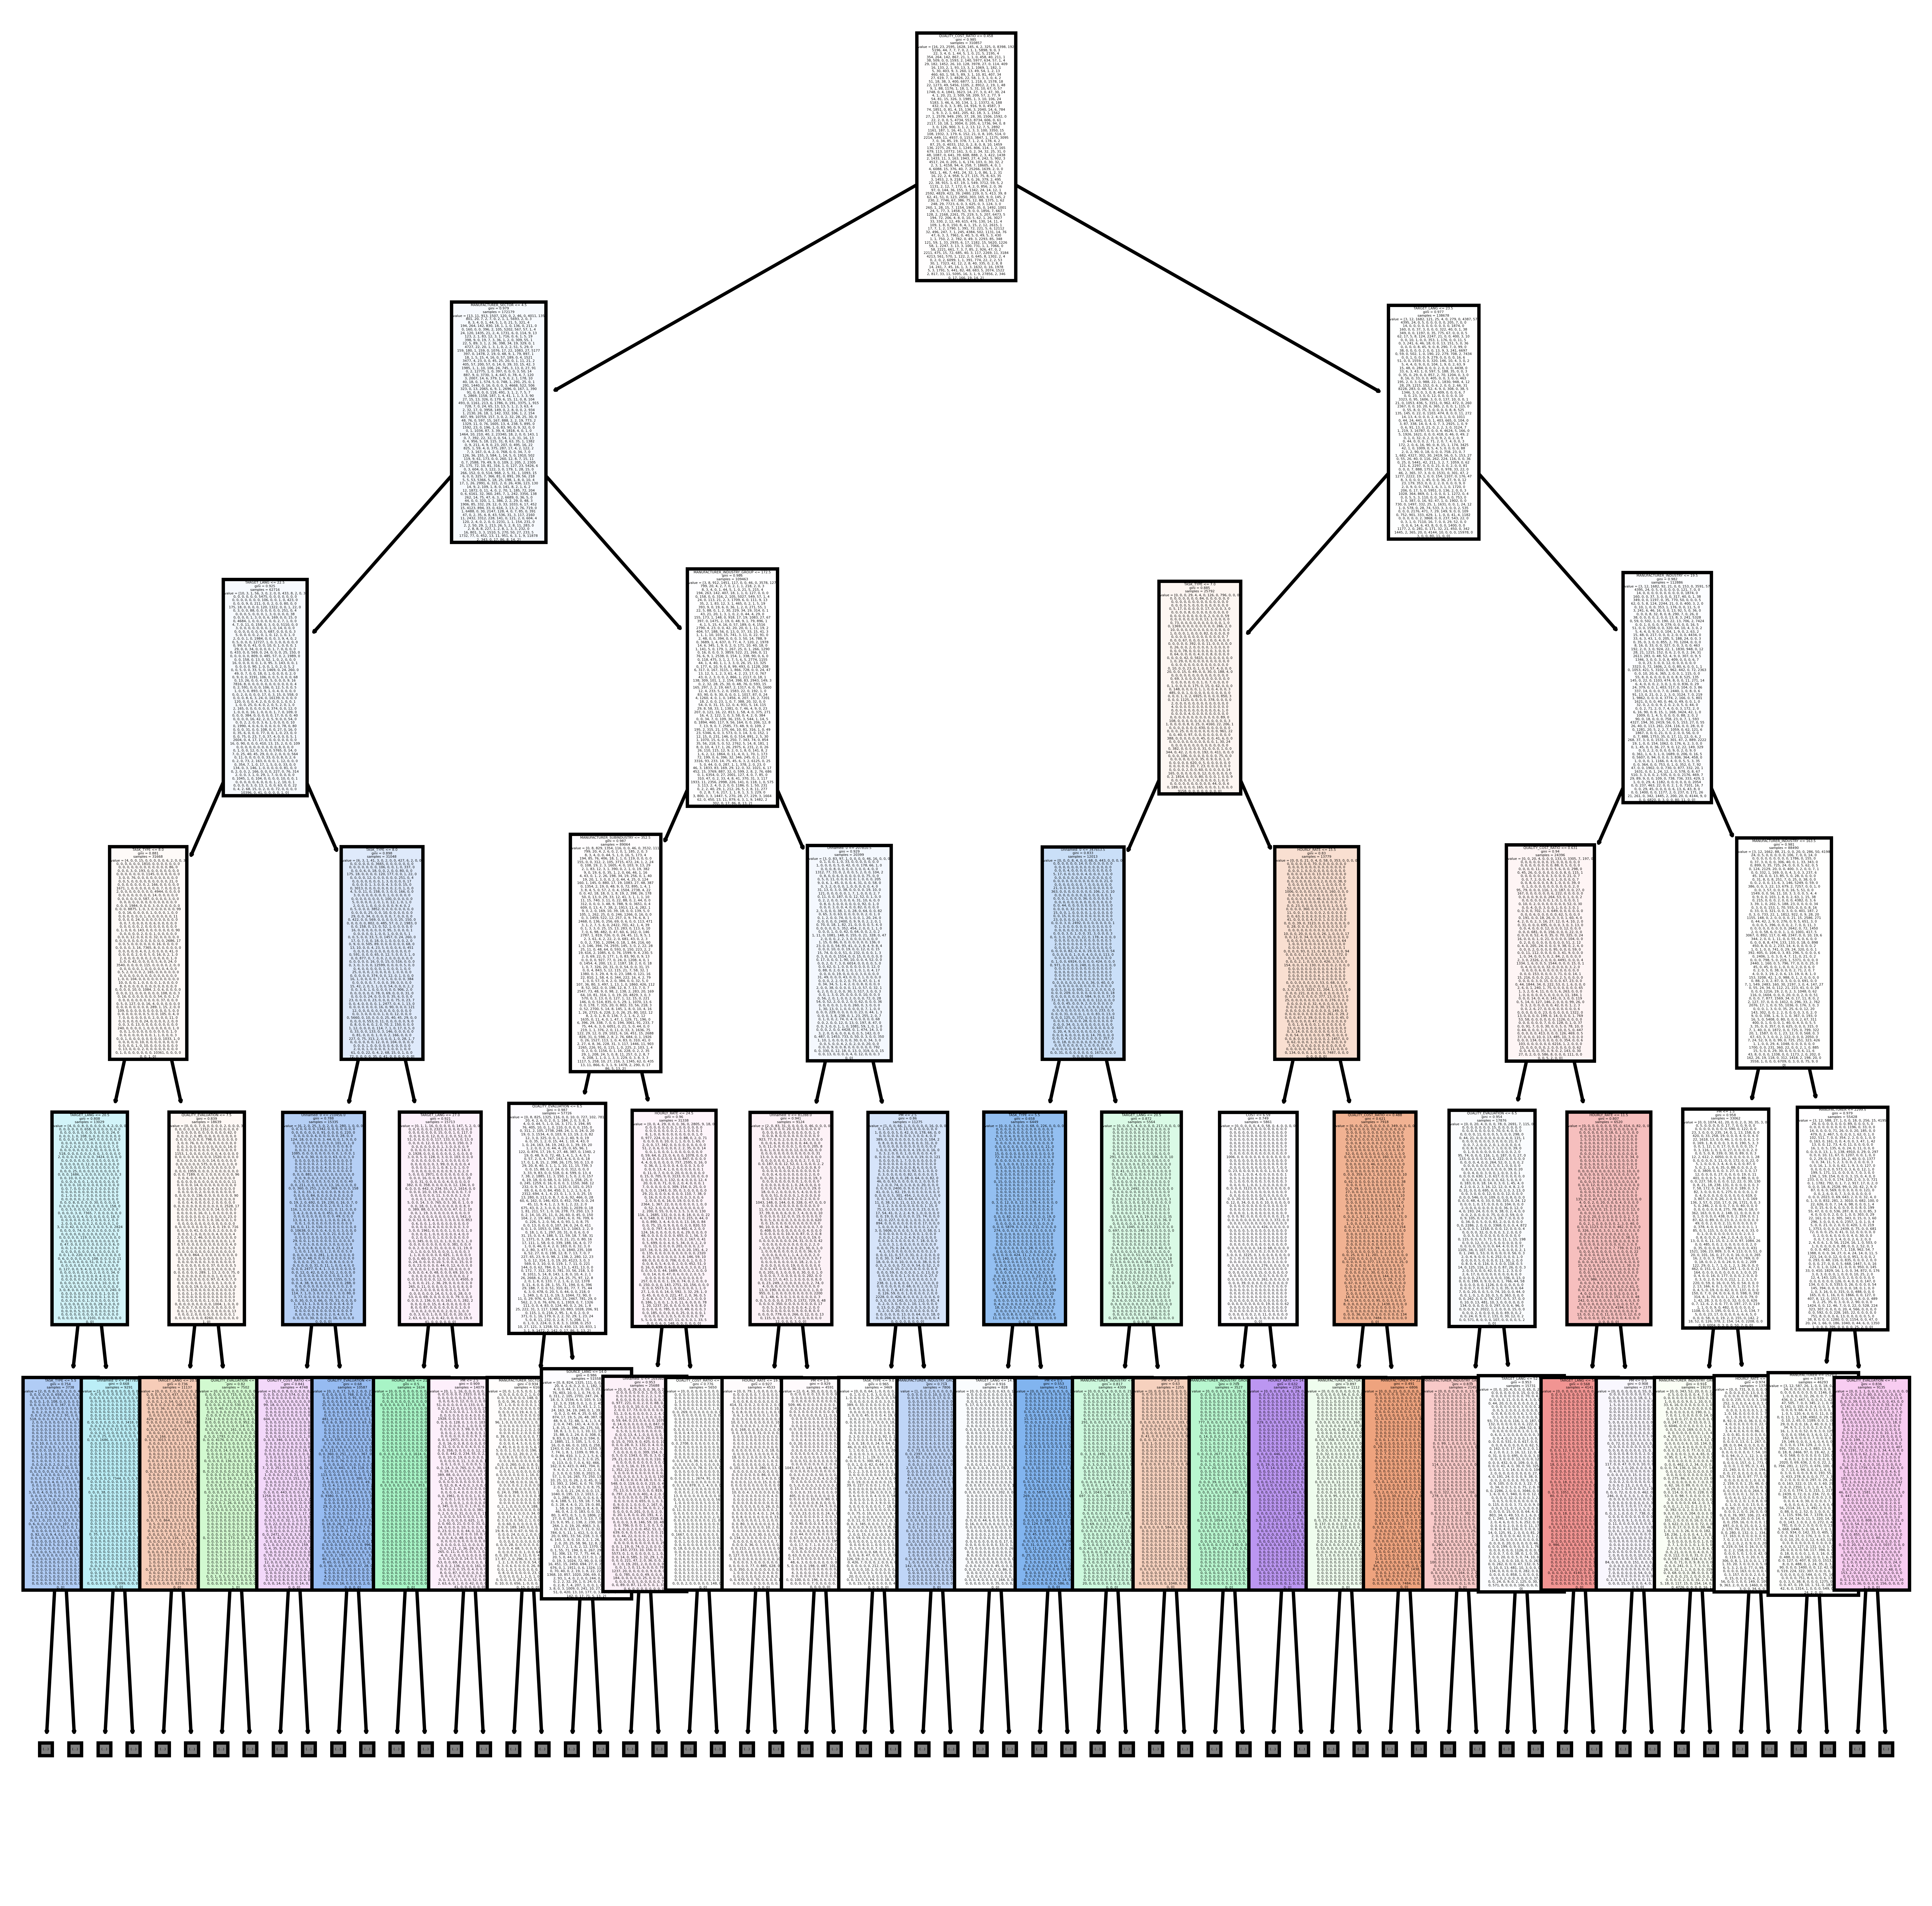

In [5]:
# visualize the first decision tree in the forest
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 10), dpi=800)
tree.plot_tree(rfc.estimators_[0], filled=True, max_depth=5, feature_names=X.columns)
plt.show()